In [5]:
## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [2]:
# Importing data 
def getting_pergene_data(datafile):
    with open(datafile) as f:
        lines = f.readlines()[1:] #skip header

    genenames_list = [None]*len(lines)
    tnpergene_list = [None]*len(lines)
    readpergene_list = [None]*len(lines) 

    line_counter = 0
    for line in lines:
        l = re.split(','' |\t', line.strip('\n'))

        genenames_list[line_counter] = l[0]
        tnpergene_list[line_counter] = int(l[1])
        readpergene_list[line_counter] = int(l[2])

        line_counter += 1

    return genenames_list,tnpergene_list,readpergene_list



In [19]:
folder="../data/"
wt_a_datafile = folder+"wt_a/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt"
wt_b_datafile = folder+"wt_b/WT_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"
bem3_a_datafile=folder+ "dbem3_a/bem3_a_pergene_tab.txt"
bem3_b_datafile=folder+"dbem3_b/bem3_b_pergene_tab.txt"
bem1bem3_a_datafile=folder+"dbem1dbem3_a/dbem1dbem3_a_tab_pergene.txt"
bem1bem3_b_datafile=folder+"dbem1dbem3_b/dbem1dbem3_b_tab_pergene.txt"
bem1_a_datafile=folder+"bem1-aid_a/bem1-aid_a_tab_pergene.txt"
bem1_b_datafile=folder+"bem1-aid_b/bem1-aid_b_tab_pergene.txt"
bem1_aid_bem3_a_datafile=folder+"bem1-aid-dbem3_a/bem1-aid-dbem3_a_tab_pergene.txt"
bem1_aid_bem3_b_datafile=folder+"bem1-aid-dbem3_b/bem1-aid-dbem3_b_tab_pergene.txt"

wt_gene,wt_a_tn,wt_a_reads = getting_pergene_data(wt_a_datafile)
wt_gene,wt_b_tn,wt_b_reads = getting_pergene_data(wt_b_datafile)


bem3_gene,bem3_a_tn,bem3_a_reads=getting_pergene_data(bem3_a_datafile)
bem3_gene,bem3_b_tn,bem3_b_reads=getting_pergene_data(bem3_b_datafile)

bem1bem3_gene,bem1bem3_a_tn,bem1bem3_a_reads=getting_pergene_data(bem1bem3_a_datafile)
bem1bem3_gene,bem1bem3_b_tn,bem1bem3_b_reads=getting_pergene_data(bem1bem3_b_datafile)

bem1_gene,bem1_b_tn,bem1_b_reads=getting_pergene_data(bem1_b_datafile)
bem1_gene,bem1_a_tn,bem1_a_reads=getting_pergene_data(bem1_a_datafile)

bem1_aid_bem3_gene,bem1_aid_bem3_a_tn,bem1_aid_bem3_a_reads=getting_pergene_data(bem1_aid_bem3_a_datafile)
bem1_aid_bem3_gene,bem1_aid_bem3_b_tn,bem1_aid_bem3_b_reads=getting_pergene_data(bem1_aid_bem3_b_datafile)

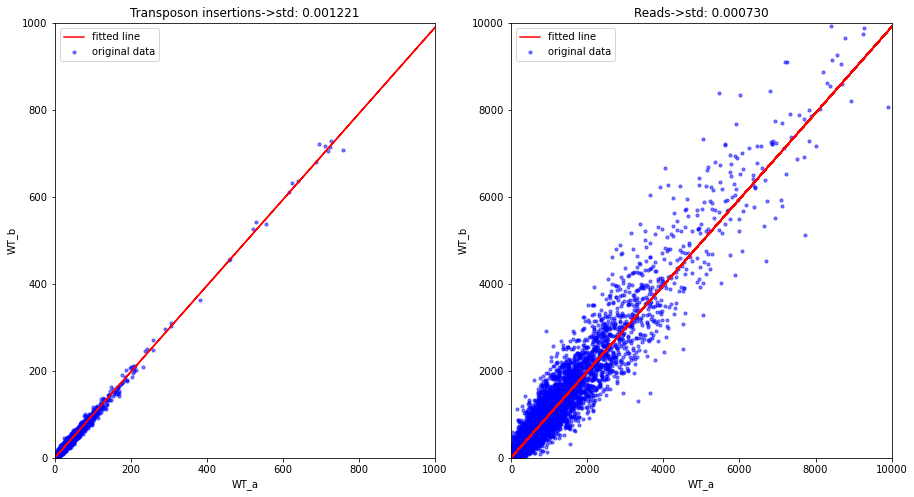

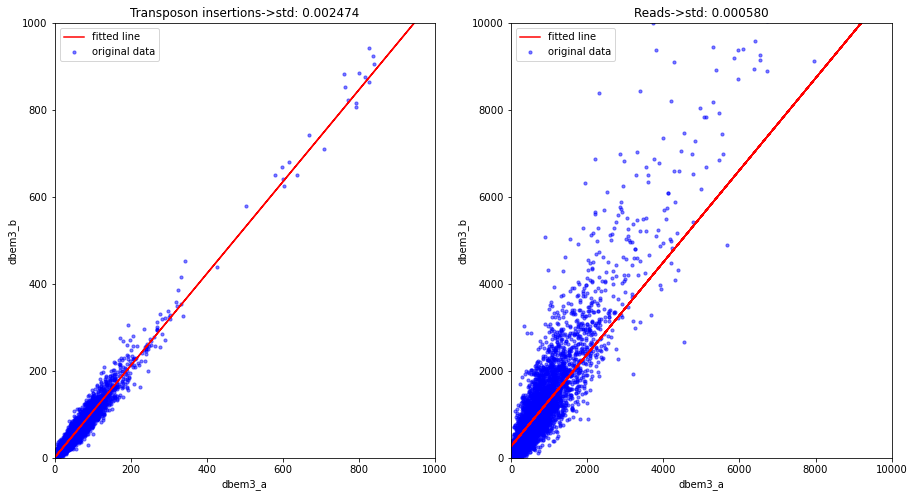

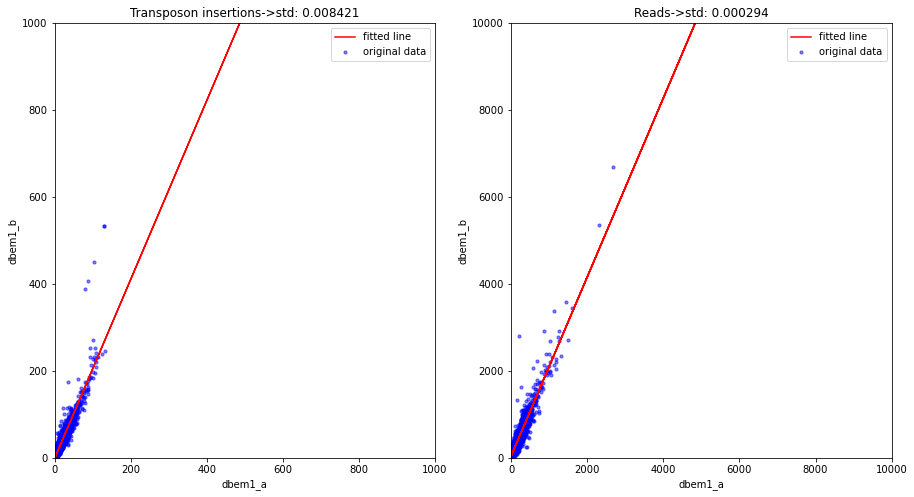

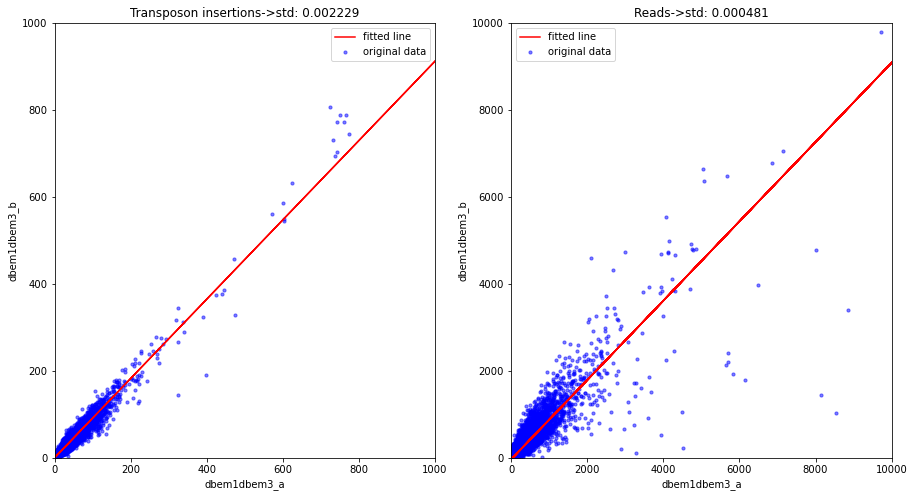

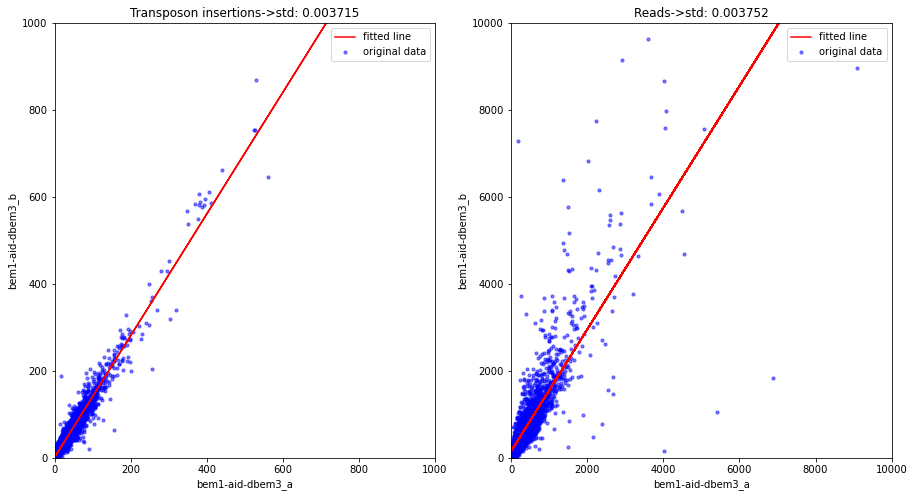

In [20]:
from scatter_replicates import scatter_replicates
scatter_replicates([wt_a_tn,wt_b_tn,wt_a_reads,wt_b_reads],["WT_a","WT_b"],1000,10000)
scatter_replicates([bem3_a_tn,bem3_b_tn,bem3_a_reads,bem3_b_reads],["dbem3_a","dbem3_b"],1000,10000,save=True)
scatter_replicates([bem1_a_tn,bem1_b_tn,bem1_a_reads,bem1_b_reads],["dbem1_a","dbem1_b"],1000,10000,save=True)
scatter_replicates([bem1bem3_a_tn,bem1bem3_b_tn,bem1bem3_a_reads,bem1bem3_b_reads],["dbem1dbem3_a","dbem1dbem3_b"],1000,10000,save=True)
scatter_replicates([bem1_aid_bem3_a_tn,bem1_aid_bem3_b_tn,bem1_aid_bem3_a_reads,bem1_aid_bem3_b_reads],["bem1-aid-dbem3_a","bem1-aid-dbem3_b"],1000,10000,save=True)

In [ ]:
def array2frame(arrays,index):
    df=pd.DataFrame(arrays)
    df=df.transpose()
    df.index=index
    df.columns=["transposons", "reads"]
    return df


In [ ]:
bem3_a=[bem3_a_tn,bem3_a_reads]
bem3_b=[bem3_b_tn,bem3_b_reads]

bem1bem3_a=[bem1bem3_a_tn,bem1bem3_a_reads]
bem1bem3_b=[bem1bem3_b_tn,bem1bem3_b_reads]

bem1_b=[bem1_b_tn,bem1_b_reads]
index=bem3_gene

df_bem3_a=array2frame(bem3_a,bem3_gene)
df_bem3_b=array2frame(bem3_b,bem3_gene)

df_bem1bem3_a=array2frame(bem1bem3_a,bem3_gene)
df_bem1bem3_b=array2frame(bem1bem3_b,bem3_gene)

df_bem1_b=array2frame(bem1_b,bem3_gene)



In [ ]:
df_bem3=pd.concat([df_bem3_a,df_bem3_b],keys=["a","b"])
df_bem1bem3=pd.concat([df_bem1bem3_a,df_bem1bem3_b],keys=["a","b"])

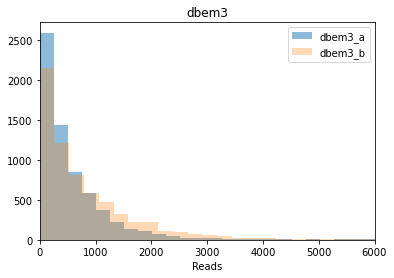

In [ ]:
plt.hist(df_bem3.loc["a","reads"],bins=4000,alpha=0.5,label="dbem3_a")
plt.hist(df_bem3.loc["b","reads"],bins=4000,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,6000)
plt.xlabel("Reads")
plt.title("dbem3")
plt.legend()

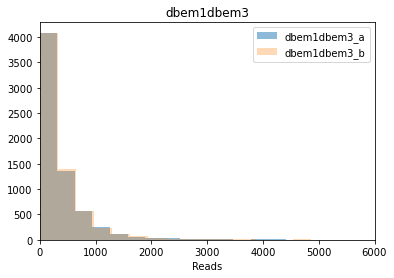

In [ ]:
plt.hist(df_bem1bem3.loc["a","reads"],bins=4000,alpha=0.5,label="dbem1dbem3_a")
plt.hist(df_bem1bem3.loc["b","reads"],bins=4000,alpha=0.3,label="dbem1dbem3_b"); 
plt.xlim(0,6000)
plt.xlabel("Reads")
plt.title("dbem1dbem3")
plt.legend()

In [ ]:

for j in df_bem3.index:
    
    if df_bem3.loc[j,"transposons"]>5:

        df_bem3.loc[j,"reads-per-tr"]=df_bem3.loc[j,"reads"]/(df_bem3.loc[j,"transposons"]-1)

    else :
        df_bem3.loc[j,"reads-per-tr"]=0

In [ ]:
for j in df_bem1bem3.index:
    
    if df_bem1bem3.loc[j,"transposons"]>5:

        df_bem1bem3.loc[j,"reads-per-tr"]=df_bem1bem3.loc[j,"reads"]/(df_bem1bem3.loc[j,"transposons"]-1)

    else :
        df_bem1bem3.loc[j,"reads-per-tr"]=0

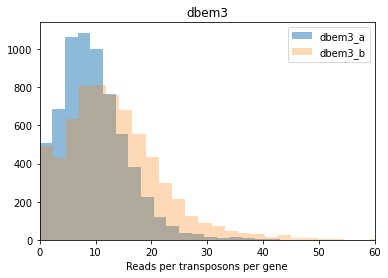

In [ ]:
plt.hist(df_bem3.loc["a","reads-per-tr"],bins=200,alpha=0.5,label="dbem3_a")
plt.hist(df_bem3.loc["b","reads-per-tr"],bins=200,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,60)
plt.xlabel("Reads per transposons per gene")
plt.title("dbem3")
plt.legend()

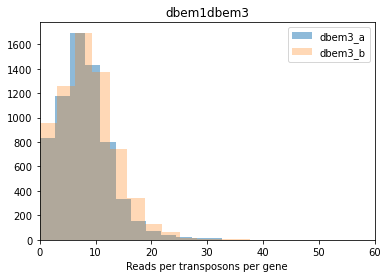

In [ ]:
plt.hist(df_bem1bem3.loc["a","reads-per-tr"],bins=200,alpha=0.5,label="dbem3_a")
plt.hist(df_bem1bem3.loc["b","reads-per-tr"],bins=200,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,60)
plt.xlabel("Reads per transposons per gene")
plt.title("dbem1dbem3")
plt.legend()

In [ ]:
len(df_bem1bem3[(df_bem1bem3.loc[:, "transposons"]<5) & (df_bem1bem3.loc[:, "reads"]<10)])

765

In [ ]:
len(df_bem3[(df_bem3.loc[:, "transposons"]<5)& (df_bem3.loc[:, "reads"]<10)])

368

In [ ]:
len(df_bem1_b[(df_bem1_b.loc[:, "transposons"]<5)&(df_bem1_b.loc[:, "reads"]<10)])

801

In [32]:
## Read per gene insertions 

def read_pergene_insertions_file(filename): 
    """Read the pergene insertions file and converts to numbers the insertion
    and reads vector

    Parameters
    ----------
    filename : str 
        Path to the pergene insertion file 

    Returns
    -------
    DataFrame
        The data as a dataframe 
    """


    data=pd.read_csv(filename,sep="\t")
    lst=[data["Reads per insertion location"]]

    total=[]
    for j in lst:
        reads_per_location=[]
        for i in data.index:
            q1=[int(s) for s in re.findall(r'\d+', j[i])] # to extract numbers from a string 
            reads_per_location.append(q1)
        total.append(reads_per_location)
    data["Reads per insertion location"]=total[0]

    lst=[data["Insertion locations"]]    

    total=[]
    for j in lst:
        insertion_locations=[]
        for i in data.index:
            q1=[int(s) for s in re.findall(r'\d+', j[i])] # to extract numbers from a string 
            insertion_locations.append(q1)
        total.append(insertion_locations)

    data["Insertion locations"]=total[0]
        
    

    return data 


In [33]:
folder="../data/"
wt_a_datafile = folder+"wt_a/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene_insertions.txt"
wt_b_datafile = folder+"wt_b/WT_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene_insertions.txt"
bem3_a_datafile=folder+ "dbem3_a/all_cleaned_fw_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem3_b_datafile=folder+"dbem3_b/yLIC137_8_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem1bem3_a_datafile=folder+"dbem1dbem3_a/yTW001_4_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem1bem3_b_datafile=folder+"dbem1dbem3_b/yTW001_6_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem1_a_datafile=folder+"bem1-aid_a/yWT03a_16_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem1_b_datafile=folder+"bem1-aid_b/yWT03a_21_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem1_aid_bem3_a_datafile=folder+"bem1-aid-dbem3_a/yWT04a_14_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"
bem1_aid_bem3_b_datafile=folder+"bem1-aid-dbem3_b/yWT04a_23_merged_cleaned_forward_reads_trimmed.sorted.bam_pergene_insertions.txt"

datafile=[wt_a_datafile,wt_b_datafile,bem3_a_datafile,bem3_b_datafile,bem1bem3_a_datafile,
bem1bem3_b_datafile,bem1_a_datafile,bem1_b_datafile,bem1_aid_bem3_a_datafile,bem1_aid_bem3_b_datafile]

In [34]:
data=[]
for i in datafile:
    data.append(read_pergene_insertions_file(i))

In [51]:
for i in data:
    for j in i.index:
        if not i.loc[j,"Reads per insertion location"]==[]: 
            i.loc[j,"Reads"]=np.sum(i.loc[j,"Reads per insertion location"])-np.max(i.loc[j,"Reads per insertion location"]) #REMOVE LARGEST VALUE TO REDUCE NOISE
            i.loc[j,"Insertions"]=len(i.loc[j,"Reads per insertion location"])
        else:
            i.loc[j,"Reads"]=0
            i.loc[j,"Insertions"]=0


Gene name Chromosome  Start location  End location  \
0       YAL069W          I             335           649   
1     YAL068W-A          I             538           792   
2          PAU8          I            1807          2169   
3     YAL067W-A          I            2480          2707   
4          SEO1          I            7235          9016   
...         ...        ...             ...           ...   
6595       ARR3        XVI          939922        941136   
6596    YPR202W        XVI          943032        943896   
6597    YPR203W        XVI          943880        944188   
6598    YPR204W        XVI          944603        947701   
6599  YPR204C-A        XVI          946856        947338   

                                    Insertion locations  \
0     [336, 340, 349, 353, 381, 387, 441, 446, 476, ...   
1     [557, 563, 564, 568, 571, 573, 579, 596, 687, ...   
2     [1809, 1811, 1813, 1816, 1820, 1880, 1886, 189...   
3     [2485, 2491, 2494, 2498, 2505, 2552, 2572, 258...   
4     [7253, 7294, 7351, 7360, 7362, 7366, 7404, 740...   
...                                                 ...   
6595  [939930, 939964, 939999, 940002, 940005, 94000...   
6596  [943035, 943046, 943048, 943051, 943070, 94308...   
6597  [943885, 943894, 943912, 943915, 943916, 94391...   
6598  [944609, 944623, 944634, 944637, 944637, 94464...   
6599  [946861, 946867, 946881, 946924, 946975, 94697...   

                           Reads per insertion location  Total reads   Reads  \
0     [141, 2, 1, 2, 2, 91, 73, 27, 1, 36, 2, 7, 16,...        963.0   781.0   
1              [1, 17, 7, 1, 15, 110, 4, 1, 35, 99, 53]        343.0   233.0   
2     [8, 49, 4, 3, 81, 43, 4, 15, 152, 2, 95, 3, 1,...        790.0   638.0   
3                [3, 9, 54, 6, 3, 5, 23, 1, 41, 27, 38]        210.0   156.0   
4     [18, 6, 80, 247, 104, 20, 116, 5, 1, 76, 2, 2,...       1330.0  1083.0   
...                                                 ...          ...     ...   
6595  [191, 26, 35, 2, 5, 7, 14, 2, 126, 1, 90, 1, 4...       1641.0  1231.0   
6596  [22, 1, 2, 5, 5, 29, 5, 19, 62, 18, 12, 1, 87,...       1768.0  1576.0   
6597  [8, 35, 2, 2, 2, 2, 50, 21, 38, 6, 3, 1, 12, 1...        491.0   441.0   
6598  [6, 21, 18, 15, 15, 1, 17, 7, 3, 5, 17, 16, 12...       4652.0  4460.0   
6599  [36, 1, 2, 37, 50, 1, 1, 8, 1, 2, 4, 5, 7, 21,...        777.0   717.0   

      Insertions  
0           27.0  
1           11.0  
2           18.0  
3           11.0  
4           39.0  
...          ...  
6595        35.0  
6596       105.0  
6597        36.0  
6598       381.0  
6599        66.0  

[6600 rows x 9 columns]